In [2]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importing dataset
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [4]:
#summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [5]:
# df.drop(columns=['Sexual Activity'], inplace=True)

In [6]:
# unique values in each columns
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Sexual Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [7]:
# merging same values in 'Suicidal thoughts' column
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_7768\1254054704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


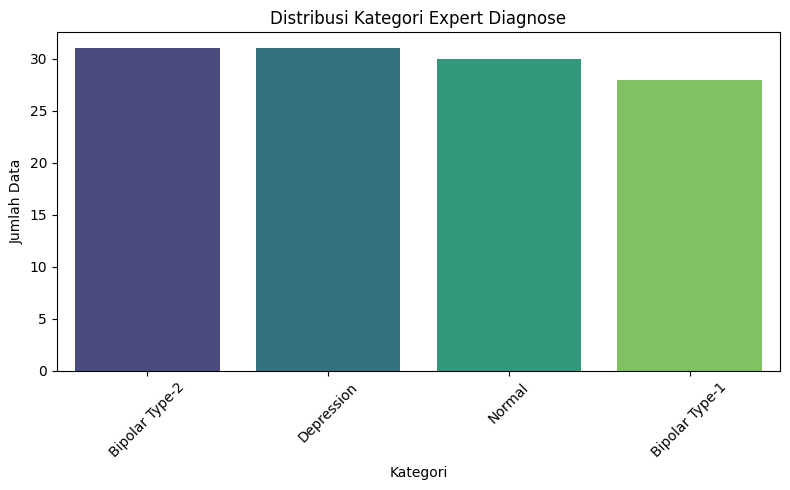

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misal df adalah DataFrame kamu
plt.figure(figsize=(8,5))

# Hitung frekuensi tiap kategori
counts = df['Expert Diagnose'].value_counts()

# Barplot
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.title('Distribusi Kategori Expert Diagnose')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
manual_encoders = {
    "Sadness": {
        "Most-Often": 0,
        "Seldom": 1,
        "Sometimes": 2,
        "Usually": 3
    },
    "Euphoric": {
        "Most-Often": 0,
        "Seldom": 1,
        "Sometimes": 2,
        "Usually": 3
    },
    "Exhausted": {
        "Most-Often": 0,
        "Seldom": 1,
        "Sometimes": 2,
        "Usually": 3
    },
    "Sleep dissorder": {
        "Most-Often": 0,
        "Seldom": 1,
        "Sometimes": 2,
        "Usually": 3
    },
    "Mood Swing": {
        "NO": 0,
        "YES": 1
    },
    "Suicidal thoughts": {
        "NO": 0,
        "YES": 1,
        "YES ": 1  # extra space fix
    },
    "Anorxia": {
        "NO": 0,
        "YES": 1
    },
    "Authority Respect": {
        "NO": 0,
        "YES": 1
    },
    "Try-Explanation": {
        "NO": 0,
        "YES": 1
    },
    "Aggressive Response": {
        "NO": 0,
        "YES": 1
    },
    "Ignore & Move-On": {
        "NO": 0,
        "YES": 1
    },
    "Nervous Break-down": {
        "NO": 0,
        "YES": 1
    },
    "Admit Mistakes": {
        "NO": 0,
        "YES": 1
    },
    "Overthinking": {
        "NO": 0,
        "YES": 1
    },
    "Sexual Activity": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Concentration": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7
    },
    "Optimisim": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Expert Diagnose": {
        "Normal": 0,
        "Depression": 1,
        "Bipolar Type-1": 2,
        "Bipolar Type-2": 3
    }
}

manual_decoders = {
    feature: {v: k for k, v in mapping.items()}
    for feature, mapping in manual_encoders.items()
}



In [10]:
input_data = {
    "Sadness": "Usually",
    "Euphoric": "Seldom",
    "Exhausted": "Sometimes",
    "Sleep dissorder": "Usually",
    "Mood Swing": "YES",
    "Suicidal thoughts": "NO",
    "Anorxia": "NO",
    "Authority Respect": "YES",
    "Try-Explanation": "YES",
    "Aggressive Response": "NO",
    "Ignore & Move-On": "YES",
    "Nervous Break-down": "NO",
    "Admit Mistakes": "YES",
    "Overthinking": "YES",
    "Sexual Activity": "3 From 10",
    "Concentration": "5 From 10",
    "Optimisim": "7 From 10"
}

def manual_encode_df(df, manual_encoders):
    df_encoded = df.copy()
    for col, mapping in manual_encoders.items():
        if col in df_encoded.columns:
            # Fungsi untuk map value ke angka sesuai manual_encoders
            df_encoded[col] = df_encoded[col].map(mapping)
            # Jika ada nilai yang tidak ditemukan di mapping, akan jadi NaN
            if df_encoded[col].isnull().any():
                missing = df_encoded[col][df_encoded[col].isnull()].unique()
                raise ValueError(f"Found unmapped values in column '{col}': {missing}")
        else:
            print(f"Warning: Column '{col}' tidak ada di dataframe.")
    return df_encoded

# Gunakan fungsi:
df_encoded = manual_encode_df(df, manual_encoders)

In [11]:
df_encoded

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,3
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,1
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,2
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,3
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,1
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,2
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,3


In [12]:

# Pisahkan fitur dan label
X = df_encoded.drop('Expert Diagnose', axis=1)
y = df_encoded['Expert Diagnose']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Tampilkan importance
importances = model.feature_importances_
importance_df_encoded = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df_encoded)

                Feature  Importance
4            Mood Swing    0.254868
16            Optimisim    0.142348
14      Sexual Activity    0.119422
5     Suicidal thoughts    0.063152
0               Sadness    0.061947
1              Euphoric    0.052252
15        Concentration    0.049063
2             Exhausted    0.041804
7     Authority Respect    0.039680
3       Sleep dissorder    0.032234
9   Aggressive Response    0.030804
11   Nervous Break-down    0.025593
13         Overthinking    0.023341
6               Anorxia    0.017820
10     Ignore & Move-On    0.016939
12       Admit Mistakes    0.016309
8       Try-Explanation    0.012424


In [13]:
# import seaborn as sns
# columns = [
#     "Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing",
#     "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation",
#     "Aggressive Response", "Ignore & Move-On", "Nervous Break-down",
#     "Admit Mistakes", "Overthinking", "Concentration", "Sexual Activity", "Optimisim"
# ]

# df_selected = df[columns]

# # Hitung korelasi antar kolom
# corr = df_selected.corr()

# # Buat heatmap
# plt.figure(figsize=(14, 10))
# sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
# plt.title("Korelasi Antar Gejala Psikologis")
# plt.tight_layout()
# plt.show()

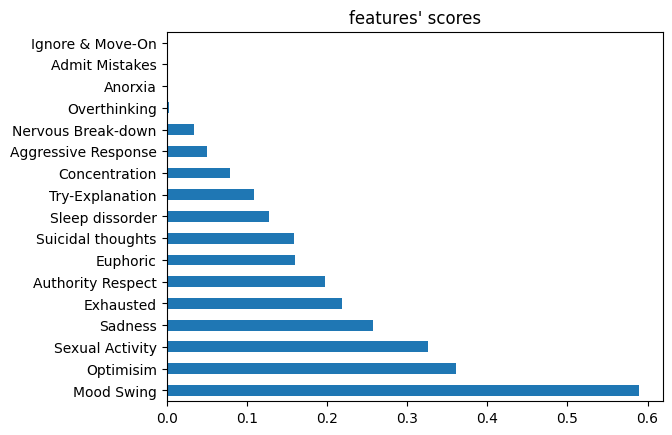

Sadness                0.257284
Euphoric               0.159931
Exhausted              0.219045
Sleep dissorder        0.127886
Mood Swing             0.589290
Suicidal thoughts      0.159436
Anorxia                0.000000
Authority Respect      0.197063
Try-Explanation        0.109300
Aggressive Response    0.050134
Ignore & Move-On       0.000000
Nervous Break-down     0.033773
Admit Mistakes         0.000000
Overthinking           0.002604
Sexual Activity        0.326618
Concentration          0.079577
Optimisim              0.361017
dtype: float64


In [14]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import pandas as pd

X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

mi_scores = mutual_info_classif(X, y, random_state=42)

feature_selection = SelectKBest(score_func=lambda X, y: mi_scores)
feature_selection.fit(X, y)

features_scores = pd.Series(mi_scores, index=X.columns)
features_scores.nlargest(18).plot(kind='barh', title="features' scores")
plt.show()

print(features_scores)


In [15]:
df.drop(columns=['Admit Mistakes', 'Ignore & Move-On'], inplace=True)

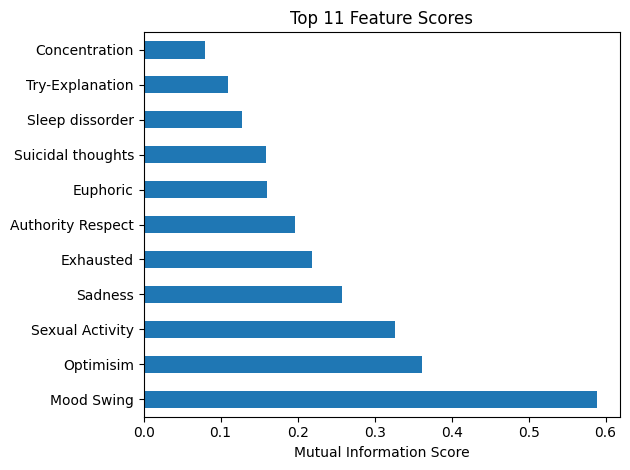

Top 11 features:
 Mood Swing           0.589290
Optimisim            0.361017
Sexual Activity      0.326618
Sadness              0.257284
Exhausted            0.219045
Authority Respect    0.197063
Euphoric             0.159931
Suicidal thoughts    0.159436
Sleep dissorder      0.127886
Try-Explanation      0.109300
Concentration        0.079577
dtype: float64


In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya df_encoded sudah terdefinisi sebelumnya
X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

# Hitung mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Buat Series dari skor dan ambil 11 terbesar
features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)

# Visualisasi
top_11_features.plot(kind='barh', title="Top 11 Feature Scores")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()

# Cetak nama fitur terbaik
print("Top 11 features:\n", top_11_features)

# Ambil data dengan 11 fitur terbaik
X_top11 = X[top_11_features.index]


In [17]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import mutual_info_classif

# # === 1. Fitur Seleksi: Mutual Information (ambil 11 fitur) ===
# X = df[df.columns[:-1]]
# y = df[df.columns[-1]]
# mi_scores = mutual_info_classif(X, y, random_state=42)
# features_scores = pd.Series(mi_scores, index=X.columns)
# top_11_features = features_scores.nlargest(11)
# X_selected = X[top_11_features.index]

# # === 2. Split data ===
# x_train, x_test, y_train, y_test = train_test_split(
#     X_selected, y, test_size=0.3, stratify=y, shuffle=True, random_state=42
# )

In [18]:
X = df_encoded.drop(columns=[df_encoded.columns[-1]])  # semua fitur kecuali target
y = df_encoded[df_encoded.columns[-1]]                  # target

x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2,
    shuffle=True,
    stratify=y  # optional, kalau mau jaga proporsi kelas
)


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Cek distribusi kelas setelah oversampling
from collections import Counter
print("Distribusi sebelum oversampling:", Counter(y_train))
print("Distribusi sesudah oversampling :", Counter(y_train_resampled))


Distribusi sebelum oversampling: Counter({3: 22, 1: 22, 0: 21, 2: 19})
Distribusi sesudah oversampling : Counter({3: 22, 2: 22, 0: 22, 1: 22})


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 50, 70],  # Lebih dangkal, menghindari pohon terlalu dalam
    'max_features': [1, 2, 'sqrt'],  # Lebih konservatif
    'min_samples_leaf': [3, 5, 7],  # Mencegah daun terlalu kecil
    'min_samples_split': [8, 10, 12],  # Mencegah split terlalu dini
    'n_estimators': [100, 200, 300]  # Lebih ringan dari 1000, cukup untuk stabil
}


# Create a based model
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 50, 70],
                         'max_features': [1, 2, 'sqrt'],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [21]:
# best parameters for model
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [22]:
y_train_pred = grid_search.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.86      0.93        22
           2       0.94      0.89      0.92        19
           3       0.92      1.00      0.96        22

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



In [23]:
y_predict=grid_search.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00         9

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



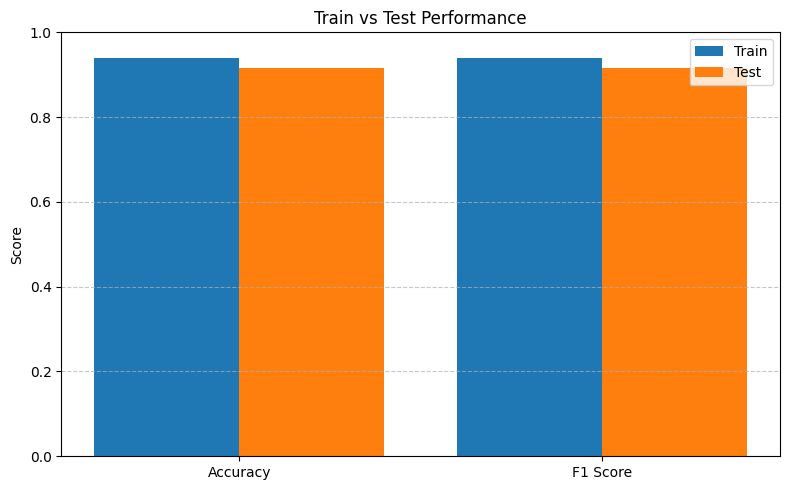

In [24]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Hitung metrik
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Bar plot
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
test_scores = [test_accuracy, test_f1]

x = range(len(metrics))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Train vs Test Performance')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


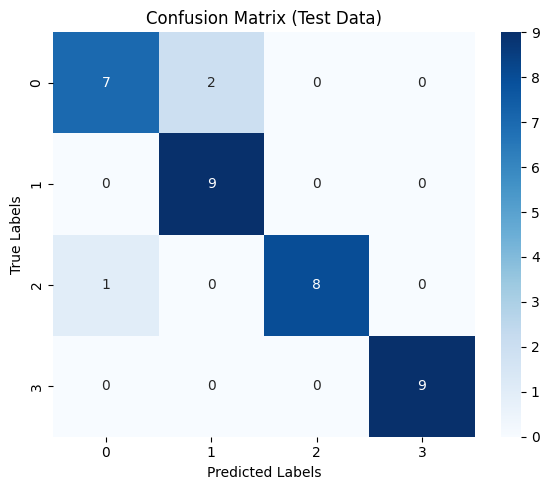

In [25]:
# Confusion matrix untuk test
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.tight_layout()
plt.show()


In [26]:
def manual_decode_df(df_encoded, manual_decoders):
    df_decoded = df_encoded.copy()
    for col, mapping in manual_decoders.items():
        if col in df_decoded.columns:
            df_decoded[col] = df_decoded[col].map(mapping)
            if df_decoded[col].isnull().any():
                missing = df_decoded[col][df_decoded[col].isnull()].unique()
                raise ValueError(f"Found unmapped values in column '{col}': {missing}")
        else:
            print(f"Warning: Column '{col}' tidak ada di dataframe.")
    return df_decoded

# Contoh decode:
df_decoded = manual_decode_df(df_encoded, manual_decoders)
print(df_decoded.head())


                  Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
Patient Number                                                                
Patiant-01        Usually      Seldom  Sometimes       Sometimes        YES   
Patiant-02        Usually      Seldom    Usually       Sometimes         NO   
Patiant-03      Sometimes  Most-Often  Sometimes       Sometimes        YES   
Patiant-04        Usually      Seldom    Usually      Most-Often        YES   
Patiant-05        Usually     Usually  Sometimes       Sometimes         NO   

               Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
Patient Number                                                               
Patiant-01                  YES       NO                NO             YES   
Patiant-02                  YES       NO                NO              NO   
Patiant-03                    NO      NO                NO             YES   
Patiant-04                  YES      YES                

In [27]:
mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(mapping)


NameError: name 'le' is not defined

In [ ]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,Bipolar Type-2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,Depression
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,Bipolar Type-1
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,Bipolar Type-2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,Depression
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,Bipolar Type-1
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,Bipolar Type-2


In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')


['best_rf_model.pkl']